#### Muhammad Sholahuddin Rasyid
#### A11.2022.14247
#### DM-4504

# Klasifikasi Menggunakan Decision Tree

Proses pembuatan model Decision Tree dengan menggunakan kriteria Entropy dimulai dengan pengumpulan dataset yang berisi fitur-fitur dan target yang ingin diprediksi, seperti kategori obesitas. Setelah data dikumpulkan, langkah pertama adalah preprocessing, di mana data dibersihkan dan dipersiapkan untuk analisis lebih lanjut seperti yang sudah dilakukan pada DM-PreProcessing.

Selanjutnya, setelah model terbuat, model akan menghitung nilai Entropy untuk setiap fitur dalam dataset. Entropy berfungsi sebagai ukuran ketidakpastian dalam data; semakin tinggi nilai Entropy, semakin tidak teratur data tersebut. Dengan menggunakan rumus Entropy, model dapat mengukur seberapa baik fitur dapat memisahkan kelas targetge

## Modeling akan dilakukan dengan membandingan akurasi yang berbada dari berbagai cara
- Modeling dengan dataset pure data yang sudah di pre processing
- Modeling dengan selection Feature menggunakan RFE
- Modeling dengan Selection Feature RFE dikombinasikan dengan Tuning Hyperparameter
## Model akan dievaluasi dengan cara Menghitung
- Precision: Mengukur proporsi prediksi positif yang benar dari semua prediksi positif.
- Recall: Mengukur proporsi prediksi positif yang benar dari semua kasus positif yang sebenarnya.
- F1-Score: Merupakan rata-rata harmonis dari precision dan recall, memberikan gambaran yang lebih baik tentang keseimbangan antara keduanya.
- Support: Menunjukkan jumlah sampel yang sebenarnya untuk setiap kelas.
- Akurasi: Mengukur proporsi prediksi yang benar dari total prediksi yang dilakukan.
- Macro Average: Rata-rata metrik (precision, recall, f1-score) tanpa mempertimbangkan proporsi kelas.
- Weighted Average: Rata-rata metrik yang mempertimbangkan proporsi kelas dalam perhitungan.tungan



Dan Penggambaran Confussion Matrix untuk, mengevaluasi seberapa baik model dalam memprediksi label-label yakni, Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I,
Obesity Type II and Obesity Type III.

ungan.
t.

In [140]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
data = pd.read_csv('obesitas_preprocessed.csv')

### Percobaan Modeling 1 Tanpa Feature Selection pure dari Dataset yang sudah di Preprocessing 

In [143]:
# Memisahkan fitur dan label
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

In [144]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Inisialisasi dan pelatihan model dengan entropy
dt_1 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_1.fit(X_train, y_train)

# Prediksi data testing
y_pred = dt_1.predict(X_test)

# Evaluasi Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
  
accuracy = accuracy_score(y_test, y_pred)  
print("\nAccuracy Score: {:.2f}%".format(accuracy * 100))  

Confusion Matrix:
 [[76  6  0  0  0  0  0]
 [ 4 76  0  0  0  6  0]
 [ 0  0 99  0  0  2  5]
 [ 0  0  1 88  0  0  0]
 [ 0  0  0  1 96  0  0]
 [ 1  5  0  0  0 76  5]
 [ 0  0  0  0  0  7 80]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.94      0.93      0.93        82
      Normal_Weight       0.87      0.88      0.88        86
     Obesity_Type_I       0.99      0.93      0.96       106
    Obesity_Type_II       0.99      0.99      0.99        89
   Obesity_Type_III       1.00      0.99      0.99        97
 Overweight_Level_I       0.84      0.87      0.85        87
Overweight_Level_II       0.89      0.92      0.90        87

           accuracy                           0.93       634
          macro avg       0.93      0.93      0.93       634
       weighted avg       0.93      0.93      0.93       634


Accuracy Score: 93.22%


### Evaluasi Model

#### Confussion Matrix
- Baris: Menunjukkan label sebenarnya (true labels).- Kolom: Menunjukkan label yang diprediksi (predicted labels).
- 
Nilai di dalam tabel: Menunjukkan jumlah prediksi yang benar dan salha
#### Interpretasi:
- Normal Weight, 76 benar diprediksi sebagai Normal Weight, 6 salah diprediksi sebagai Overweight Level I.
- Overweight Level I, 76 benar diprediksi, 4 salah diprediksi sebagai Insufficient Weight, dan 6 sebagai Overweight Level II.
- Obesity Type I, 99 benar diprediksi, 2 salah diprediksi sebagai Obesity Type II, dan 5 sebagai Obesity Type III.
- Obesity Type II, 88 benar diprediksi, 1 salah diprediksi sebagai Obesity Type I.
- Insufficient Weight, 96 benar diprediksi, 1 salah diprediksi sebagai Obesity Type I.
- Obesity Type III, 76 benar diprediksi, 5 salah diprediksi sebagai Overweight Level I.
- Overweight Level II, 80 benar diprediksi, 7 salah diprediksi sebagai Overweight LIe

Model yang diuji menunjukkan kinerja sangat baik dengan akurasi keseluruhan sebesar 93.22%. Kelas "Insufficient_Weight" memiliki precision 0.94 dan recall 0.93, menunjukkan akurasi tinggi dalam identifikasi. "Normal_Weight" juga baik dengan precision 0.87 dan recall 0.88, meskipun ada ruang untuk perbaikan. Kelas "Obesity_Type_I" dan "Obesity_Type_II" sangat efektif, masing-masing dengan precision 0.99 dan recall 0.99 serta 0.96. 

"Obesity_Type_III" menunjukkan precision sempurna (1.00) tetapi recall lebih rendah (0.89), menandakan kesulitan dalam menemukan semua contoh. Kelas "Overweight_Level_I" dan "Overweight_Level_II" memiliki kinerja terendah, dengan precision 0.88 dan 0.89 serta recall 0.87 dan 0.82. Rata-rata makro dan tertimbang menunjukkan konsistensi kinerja model di seluruh kelas, masing-masing dengan nilai 0.93.endah.




l I.h.



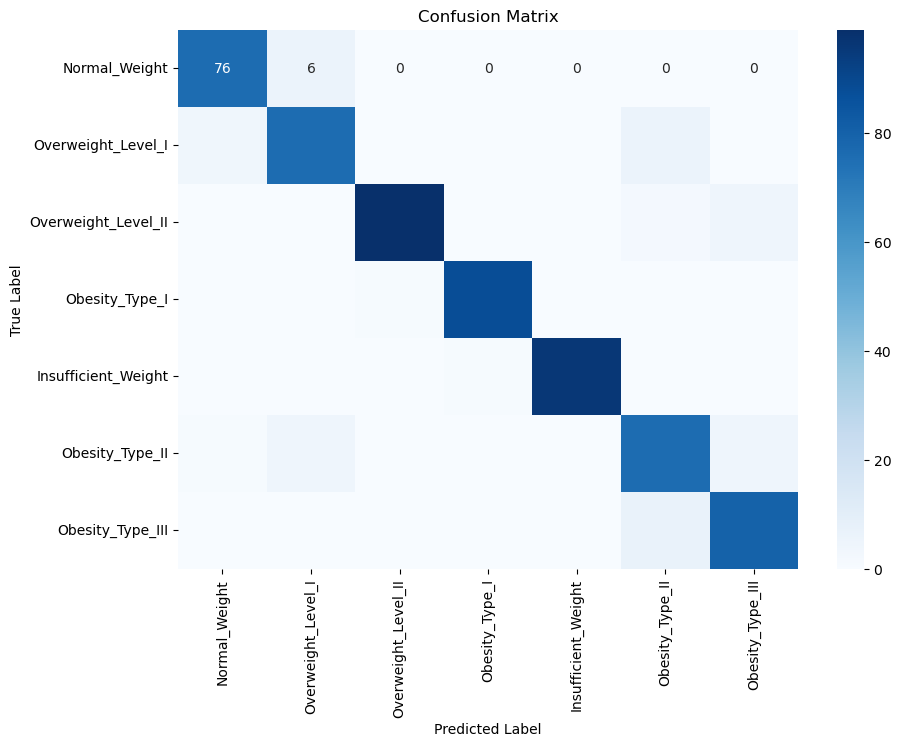

In [146]:
# Hitung confusion matrix  
cm = confusion_matrix(y_test, y_pred)  
  
# Buat visualisasi confusion matrix  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())  
plt.title('Confusion Matrix')  
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')  
plt.show()  

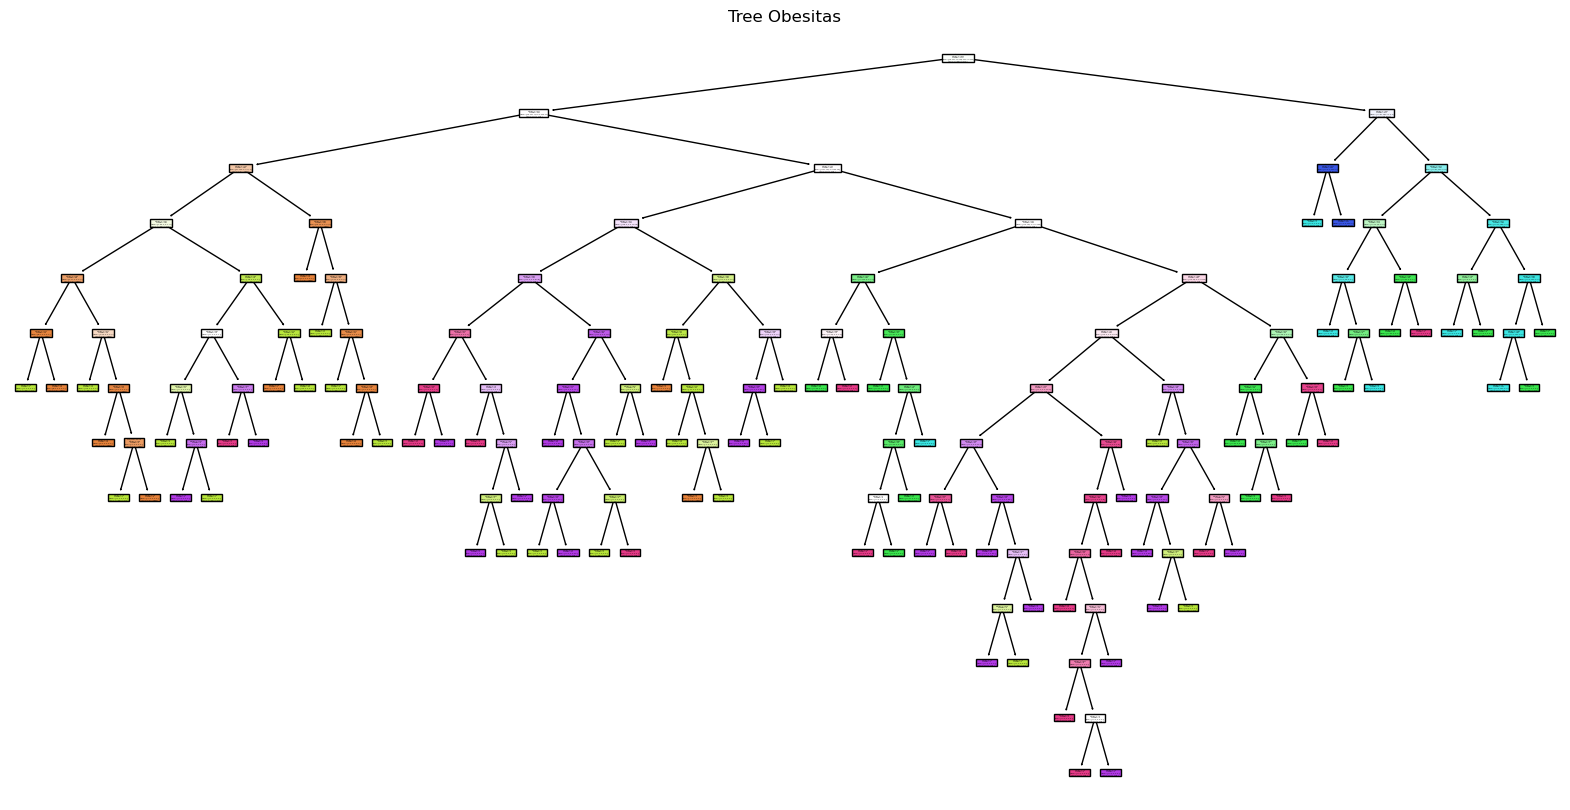

In [147]:
plt.figure(figsize=(20,10))  
plot_tree(dt_1, filled=True, feature_names=X.columns, class_names=y.unique())  
plt.title("Tree Obesitas")  
plt.show()  


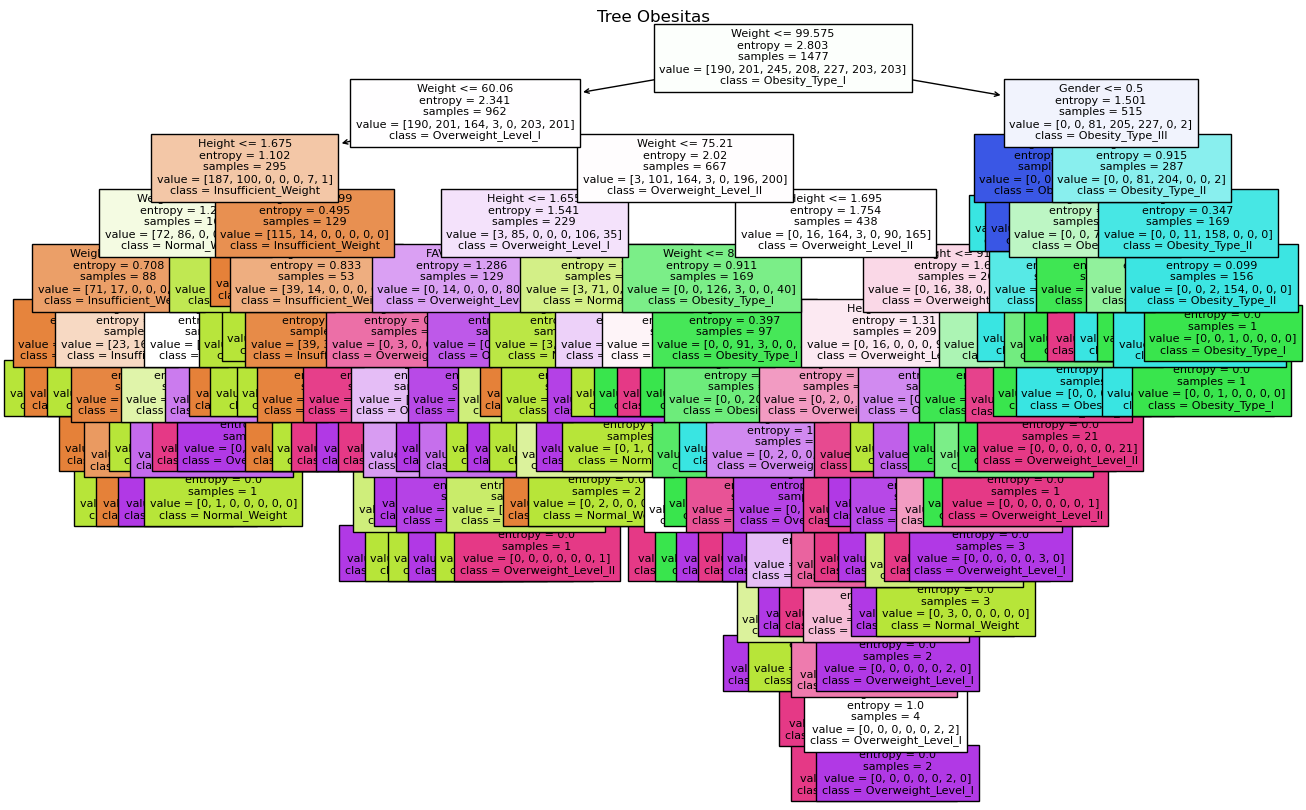

In [148]:
# Visualisasi Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_1, feature_names=X.columns, class_names=dt_1.classes_, filled=True, fontsize=8)
plt.title("Tree Obesitas")
plt.show()

### Mencoba Prediksi data baru dengan Model dt_1 (Tanpa feature selection tanpa Tuning Hyperparameter)

In [150]:
# Membuat DataFrame dengan data baru untuk diprediksi  
data_baru = pd.DataFrame({  
    'Gender': [1.0, 0.0, 1.0],  # 1.0 untuk laki-laki, 0.0 untuk perempuan  
    'Age': [30, 25, 40],         # Usia  
    'Height': [175.0, 160.0, 180.0],  # Tinggi dalam cm  
    'Weight': [70.0, 55.0, 90.0],      # Berat dalam kg  
    'fam_history': [1.0, 0.0, 1.0],     # 1.0 jika ada riwayat keluarga, 0.0 jika tidak  
    'FAVC': [1.0, 0.0, 1.0],            # 1.0 jika sering makan cepat saji, 0.0 jika tidak  
    'FCVC': [2, 1, 3],                  # Frekuensi konsumsi sayuran (1-3)  
    'NCP': [3, 2, 4],                   # Frekuensi konsumsi makanan cepat saji (1-4)  
    'CAEC': [2, 1, 3],                  # 0: Tidak, 1: Terkadang, 2: Sering, 3: Selalu  
    'SMOKE': [0.0, 1.0, 0.0],           # 1.0 jika merokok, 0.0 jika tidak  
    'CH2O': [2.0, 1.5, 3.0],            # Konsumsi air (liter)  
    'SCC': [1.0, 0.0, 1.0],             # 1.0 jika memiliki masalah kesehatan, 0.0 jika tidak  
    'FAF': [2, 1, 3],                   # Frekuensi aktivitas fisik (1-3)  
    'TUE': [1, 0, 2],                   # Frekuensi transportasi (0-2)  
    'CALC': [0.0, 1.0, 2.0],            # 0: Tidak, 1: Terkadang, 2: Sering, 3: Selalu  
    'MTRANS': [1, 2, 0]                 # 0: Transportasi Umum, 1: Mobil, 2: Jalan Kaki, 3: Motor  
})  
  
# Menampilkan data baru  
print("Data Baru untuk Prediksi:")  
print(data_baru)  
  
# Memisahkan fitur dari data baru  
X_baru = data_baru  
  
# Melakukan prediksi menggunakan model yang telah dilatih  
y_pred_baru = dt_1.predict(X_baru)  
  
# Menampilkan hasil prediksi  
print("\nHasil Prediksi Obesitas:")  
print(y_pred_baru)  

Data Baru untuk Prediksi:
   Gender  Age  Height  Weight  fam_history  FAVC  FCVC  NCP  CAEC  SMOKE  \
0     1.0   30   175.0    70.0          1.0   1.0     2    3     2    0.0   
1     0.0   25   160.0    55.0          0.0   0.0     1    2     1    1.0   
2     1.0   40   180.0    90.0          1.0   1.0     3    4     3    0.0   

   CH2O  SCC  FAF  TUE  CALC  MTRANS  
0   2.0  1.0    2    1   0.0       1  
1   1.5  0.0    1    0   1.0       2  
2   3.0  1.0    3    2   2.0       0  

Hasil Prediksi Obesitas:
['Normal_Weight' 'Normal_Weight' 'Overweight_Level_I']


### Percobaan Modeling 2 dengan Feeature Selection

#### Feature Selection Menggunakan RFE

Recursive Feature Elimination (RFE) mengevaluasi fitur dengan melatih model menggunakan semua fitur yang tersedia dan kemudian menilai pentingnya setiap fitur berdasarkan kontribusinya terhadap kinerja model. Fitur yang dianggap kurang penting, biasanya dengan nilai peringkat terendah, dihapus secara iteratif hingga jumlah fitur yang diinginkan tercapai. 

Metode ini sangat cocok untuk decision tree karena decision tree secara alami memberikan informasi tentang pentingnya fitur melalui pengukuran seperti Gini impurity atau entropy, sehingga RFE dapat secara efektif memanfaatkan informasi ini untuk memilih fitur yang paling relevan dan meningkatkan akurasi model.

In [153]:
from sklearn.feature_selection import RFE  

# Inisialisasi model Decision Tree  
model = DecisionTreeClassifier(criterion='entropy', random_state=42)  
  
# Inisialisasi RFE dengan model dan jumlah fitur yang ingin dipilih  
rfe = RFE(estimator=model, n_features_to_select=10)  
  
# Fit RFE  
rfe.fit(X_train, y_train)  
  
# Menampilkan fitur yang dipilih  
selected_features = X.columns[rfe.support_]  
print("Fitur yang dipilih:\n", selected_features)  
  
# Menampilkan ranking fitur  
ranking = rfe.ranking_  
print("\nRanking fitur:\n", ranking)  

# Menampilkan ranking semua fitur  
ranking = rfe.ranking_  
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})  
print(feature_ranking.sort_values(by='Ranking'))

Fitur yang dipilih:
 Index(['Gender', 'Age', 'Height', 'Weight', 'FAVC', 'NCP', 'CAEC', 'CH2O',
       'FAF', 'TUE'],
      dtype='object')

Ranking fitur:
 [1 1 1 1 5 1 7 1 1 6 1 2 1 1 4 3]
        Feature  Ranking
0        Gender        1
1           Age        1
2        Height        1
3        Weight        1
5          FAVC        1
7           NCP        1
8          CAEC        1
10         CH2O        1
12          FAF        1
13          TUE        1
11          SCC        2
15       MTRANS        3
14         CALC        4
4   fam_history        5
9         SMOKE        6
6          FCVC        7


In [154]:
# Memilih fitur yang telah dipilih    
features = ['Gender', 'Age', 'Height', 'Weight', 'FAVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE']    
X = data[features]    
y = data['NObeyesdad']     
  
# Mengubah variabel kategorikal menjadi numerik jika diperlukan    
X = pd.get_dummies(X, drop_first=True)    
  
# Membagi data menjadi set pelatihan dan set pengujian    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    
  
# Inisialisasi model Decision Tree dengan kriteria entropi    
dt_2= DecisionTreeClassifier(criterion='entropy', random_state=42)    
  
# Melatih model    
dt_2.fit(X_train, y_train)    
  
# Prediksi dan evaluasi model    
y_pred = dt_2.predict(X_test)    
  
# Menampilkan hasil evaluasi  
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))    
print("Accuracy:", accuracy_score(y_test, y_pred))    


accuracy = accuracy_score(y_test, y_pred)    
print("\nAccuracy Score: {:.2f}%".format(accuracy * 100))    

Confusion Matrix:
 [[53  3  0  0  0  0  0]
 [ 5 54  0  0  0  3  0]
 [ 0  0 74  4  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 54  0]
 [ 0  0  1  0  0  3 46]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.95      0.93        56
      Normal_Weight       0.92      0.87      0.89        62
     Obesity_Type_I       0.97      0.95      0.96        78
    Obesity_Type_II       0.93      0.98      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.90      0.96      0.93        56
Overweight_Level_II       1.00      0.92      0.96        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423

Accuracy: 0.9479905437352246

Accuracy Score: 94.80%


Setelah melakukan feature selection, terdapat perubahan signifikan dalam hasil evaluasi model.
meskipun model masih menunjukkan akurasi yang tinggi (94,80%), ada penurunan dalam kemampuan model untuk mengidentifikasi beberapa kelas. Misalnya, untuk kelas Insufficient Weight, model hanya berhasil mengklasifikasikan 53 dari 56 contoh dengan benar, dengan 5 kesalahan. 

Kelas Normal Weight juga mengalami penurunan, dengan 54 dari 62 contoh teridentifikasi dengan benar dan 5 kesalahan. Kelas Obesity Type I menunjukkan penurunan dalam jumlah yang teridentifikasi dengan benar, dengan 74 dari 78 contoh, meskipun masih cukup baik. Kelas Obesity Type II dan Overweight Level I juga menunjukkan penurunan dalam kinerja, dengan lebih banyak kesalahan dibandingkan dengan matrix pertama.
 

Kelas "Insufficient_Weight" mengalami penurunan pada precision (0.91) meskipun recall tetap tinggi (0.95). "Normal_Weight" juga sedikit menurun pada precision (0.92) tetapi recall meningkat. Kelas "Obesity_Type_I" dan "Obesity_Type_II" menunjukkan peningkatan pada precision (0.97 dan 0.93) dan recall. 

"Obesity_Type_III" tetap sempurna dengan precision dan recall 1.00. Kelas "Overweight_Level_I" dan "Overweight_Level_II" menunjukkan peningkatan pada precision (0.90 dan 1.00) dan recall, mencerminkan perbaikan dalam identifikasi. Secara keseluruhan, model menunjukkan peningkatan kinerja, terutama pada kelas obesitas.

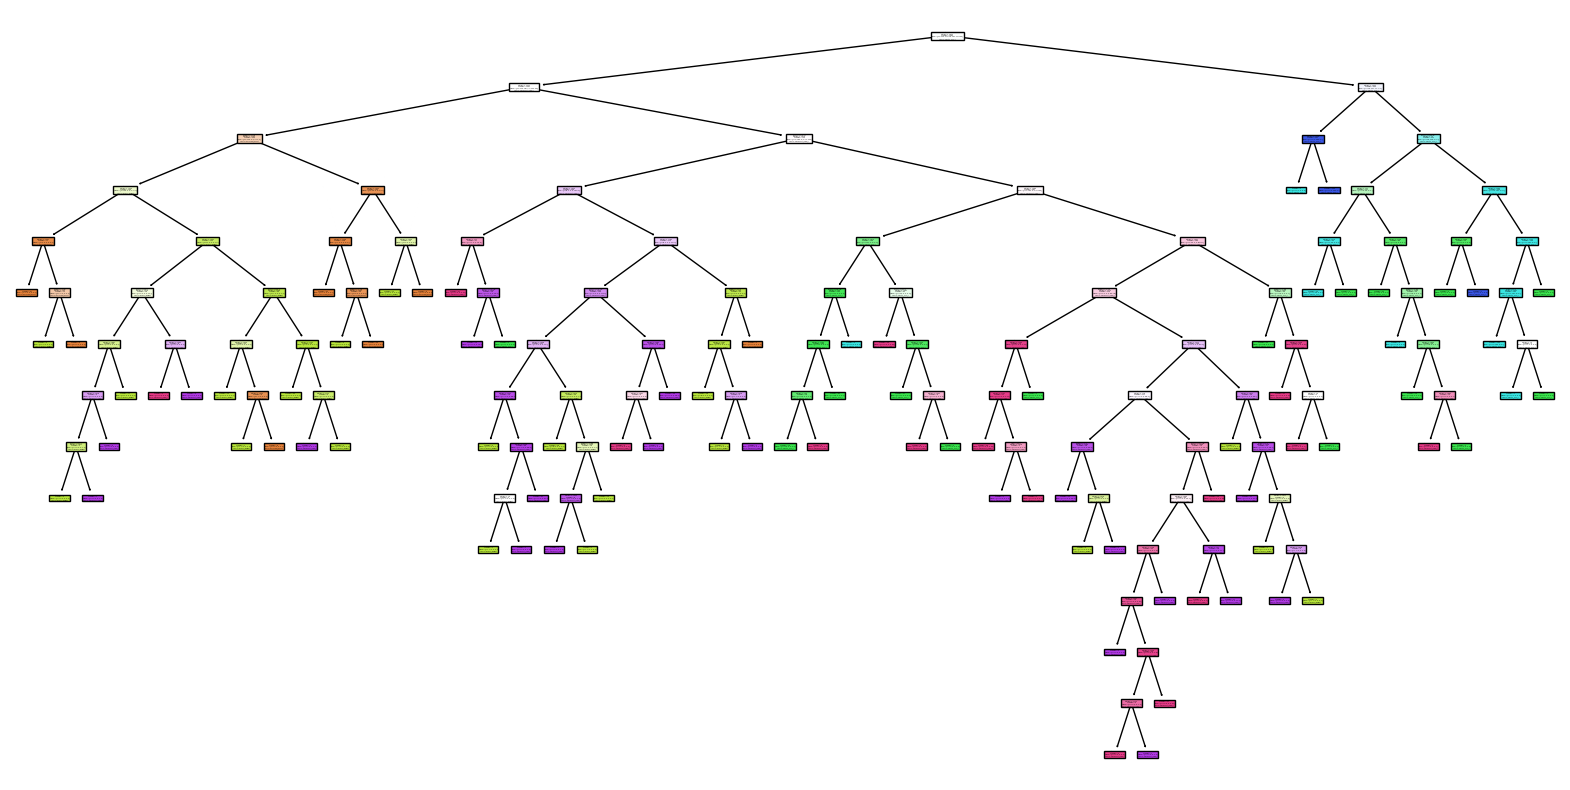

In [156]:
# Visualisasi pohon keputusan  
plt.figure(figsize=(20,10))  
plot_tree(dt_2, filled=True, feature_names=features, class_names=dt_2.classes_)  
plt.show()  


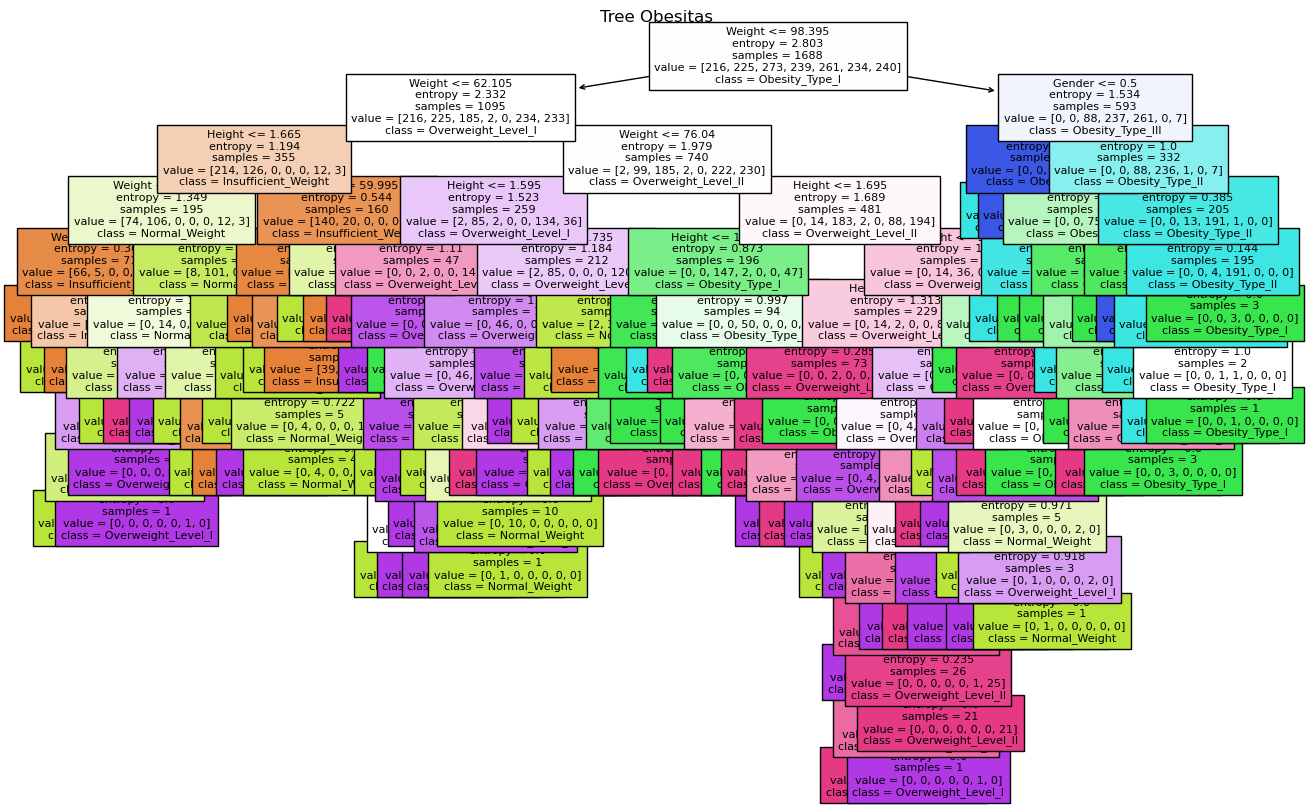

In [157]:
# Visualisasi Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_2, feature_names=features, class_names=dt_2.classes_, filled=True, fontsize=8)
plt.title("Tree Obesitas")
plt.show()

### Mencoba Prediksi data baru dengan Model dt_2 dengan feature selection 

inputan yang dimasukkan tentu hanya untuk fitur fitur yang sudah dipilih saja

In [159]:
# Membuat DataFrame dengan data baru untuk diprediksi  
data_baru = pd.DataFrame({  
    'Gender': [1.0, 0.0, 1.0],  # 1.0 untuk laki-laki, 0.0 untuk perempuan  
    'Age': [28, 35, 22],         # Usia  
    'Height': [170.0, 165.0, 180.0],  # Tinggi dalam cm  
    'Weight': [65.0, 70.0, 80.0],      # Berat dalam kg  
    'FAVC': [1.0, 0.0, 1.0],            # 1.0 jika sering makan cepat saji, 0.0 jika tidak  
    'NCP': [2, 3, 1],                   # Frekuensi konsumsi makanan cepat saji (1-4)  
    'CAEC': [1, 2, 0],                  # 0: Tidak, 1: Terkadang, 2: Sering, 3: Selalu  
    'CH2O': [2.0, 1.0, 3.0],            # Konsumsi air (liter)  
    'FAF': [3, 2, 1],                   # Frekuensi aktivitas fisik (1-3)  
    'TUE': [1, 0, 2]                    # Frekuensi transportasi (0-2)  
})  
  
# Menampilkan data baru  
print("Data Baru untuk Prediksi:")  
print(data_baru)  
  
# Memisahkan fitur dari data baru  
X_baru = data_baru  
  
# Melakukan prediksi menggunakan model yang telah dilatih  
y_pred_baru = dt_2.predict(X_baru)  
  
# Menampilkan hasil prediksi  
print("\nHasil Prediksi Obesitas:")  
print(y_pred_baru)  

Data Baru untuk Prediksi:
   Gender  Age  Height  Weight  FAVC  NCP  CAEC  CH2O  FAF  TUE
0     1.0   28   170.0    65.0   1.0    2     1   2.0    3    1
1     0.0   35   165.0    70.0   0.0    3     2   1.0    2    0
2     1.0   22   180.0    80.0   1.0    1     0   3.0    1    2

Hasil Prediksi Obesitas:
['Insufficient_Weight' 'Insufficient_Weight' 'Normal_Weight']


### Percobaan Modeling 3 dengan Feature Selection dan Tuning Hyperparameter dengan GridSearchCV

GridSearch adalah metode untuk mencari kombinasi terbaik dari hyperparameter dalam model machine learning. Dengan GridSearch, Anda bisa menentukan rentang nilai untuk setiap hyperparameter yang ingin diuji, dan alat ini akan secara otomatis mencoba semua kombinasi nilai tersebut. Proses ini melibatkan pelatihan model untuk setiap kombinasi dan mengevaluasi kinerjanya. 

In [161]:
from sklearn.model_selection import GridSearchCV  

# Memilih fitur yang telah dipilih      
features = ['Gender', 'Age', 'Height', 'Weight', 'FAVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE']      
X = data[features]      
y = data['NObeyesdad']       
    
# Membagi data menjadi set pelatihan dan set pengujian      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)      
  
# Inisialisasi model Decision Tree  
dt = DecisionTreeClassifier(random_state=42)      
  
# Menentukan parameter yang akan tuning, yaitu criterion, max_depth, dan min_samples_split
param_grid = {  
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10]  
}  
  
# Melakukan pencarian grid untuk menemukan hyperparameter terbaik  
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)  
grid_search.fit(X_train, y_train)  

#GridSearchCV diinisialisasi dengan model Decision Tree (estimator=dt), parameter grid (param_grid), 
#jumlah lipatan cross-validation (cv=5) dataset akan dibagi menjadi 5 bagian (lipatan) yang sama besar. 
#Ini berarti bahwa setiap lipatan akan digunakan sebagai data pengujian satu kali, sementara 4 lipatan lainnya digunakan untuk melatih model, 
#dan metrik evaluasi menggunakan (scoring='accuracy')


# Menampilkan hyperparameter terbaik  
print("Best Hyperparameters:", grid_search.best_params_)  
  
# Menggunakan model terbaik untuk prediksi  
best_model = grid_search.best_estimator_  
y_pred = best_model.predict(X_test)  
  
# Menampilkan hasil evaluasi    
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))    
print(classification_report(y_test, y_pred))      
print("Accuracy:", accuracy_score(y_test, y_pred))      


accuracy = accuracy_score(y_test, y_pred)      
print("\nAccuracy Score: {:.2f}%".format(accuracy * 100))    

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}
Confusion Matrix:
 [[52  4  0  0  0  0  0]
 [ 5 52  0  0  0  5  0]
 [ 0  0 74  4  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  3  0  0  0 53  0]
 [ 0  0  1  0  0  3 46]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.93      0.92        56
      Normal_Weight       0.88      0.84      0.86        62
     Obesity_Type_I       0.97      0.95      0.96        78
    Obesity_Type_II       0.93      0.98      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.87      0.95      0.91        56
Overweight_Level_II       1.00      0.92      0.96        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423

Accuracy: 0.9385342789598109

Accuracy Score: 93

Model 3 dengan melakukan Tuning Hyperparameter menunjukkan akurasi keseluruhan sebesar 93.85%, sedikit menurun dibandingkan sebelumnya. 

Kelas "Insufficient_Weight" tetap stabil dengan precision (0.91) dan recall (0.93). Namun, "Normal_Weight" mengalami penurunan pada precision (0.88) dan recall (0.80). Kelas "Obesity_Type_I" menunjukkan penurunan pada precision (0.97) dan recall (0.95). 

"Obesity_Type_II" tetap stabil, sementara "Obesity_Type_III" tetap sempurna dengan precision dan recall 1.00. Kelas "Overweight_Level_I" mengalami penurunan pada precision (0.87) dan recall (0.89), sedangkan "Overweight_Level_II" tetap tinggi dengan precision dan recall 1.00. Secara keseluruhan, ada penurunan kinerja pada beberapa kelas, terutama pada "Normal_Weight" dan "Overweight_Level_I".

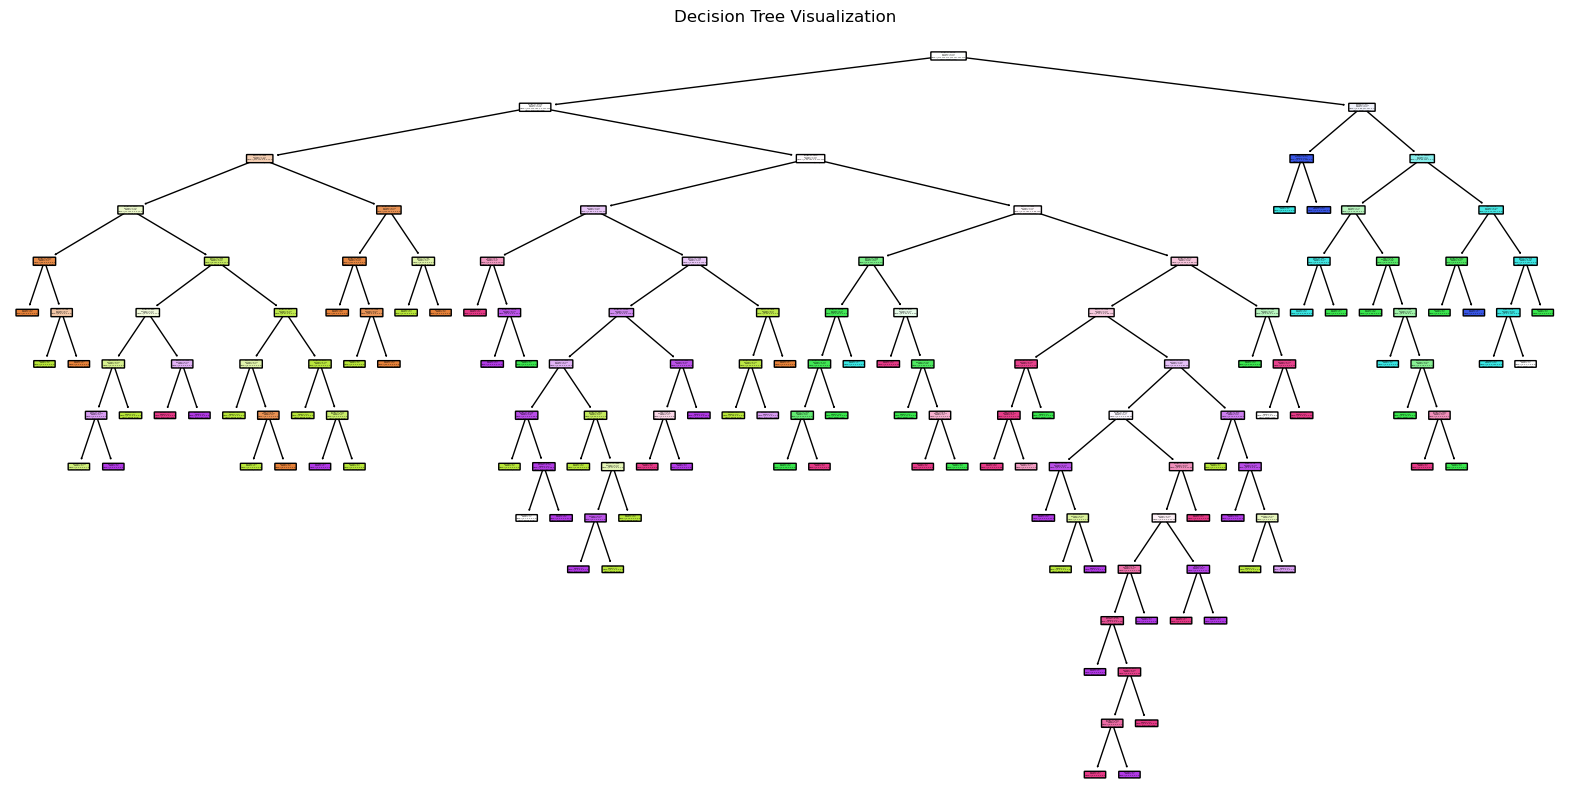

In [163]:
# Visualisasi pohon keputusan  
plt.figure(figsize=(20,10))  
plot_tree(best_model, feature_names=features, class_names=best_model.classes_, filled=True, rounded=True)  
plt.title("Decision Tree Visualization")  
plt.show()


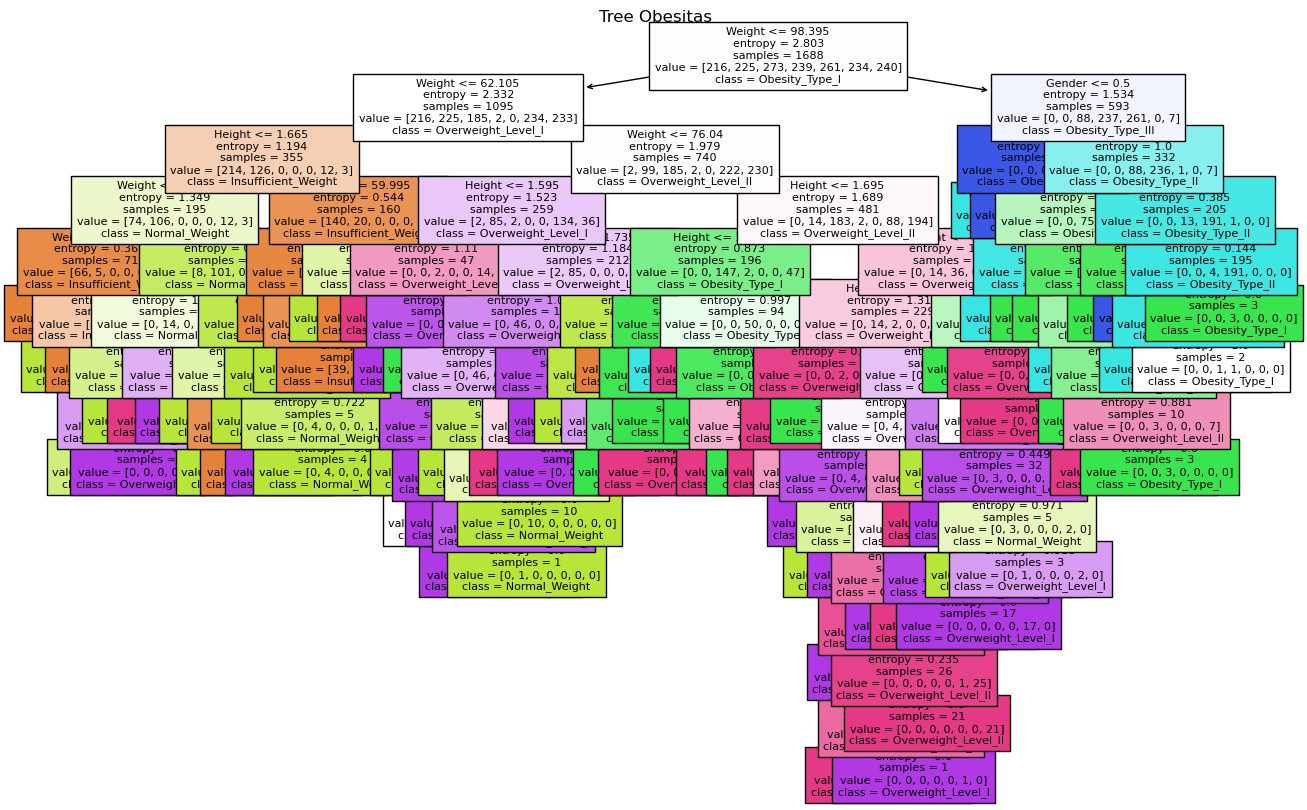

In [164]:
# Visualisasi Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=features, class_names=best_model.classes_, filled=True, fontsize=8)
plt.title("Tree Obesitas")
plt.show()

### Mencoba Prediksi data baru dengan Model decision tree yang menggunakan best parameter  dengan feature selection dikombinasi dengan Tuning Hyperparameter

In [166]:
# Membuat DataFrame dengan data baru untuk diprediksi  
data_baru = pd.DataFrame({  
    'Gender': [0.0, 1.0, 0.0],  # 1.0 untuk laki-laki, 0.0 untuk perempuan  
    'Age': [22, 35, 29],         # Usia  
    'Height': [165.0, 180.0, 170.0],  # Tinggi dalam cm  
    'Weight': [50.0, 85.0, 65.0],      # Berat dalam kg  
    'FAVC': [0.0, 1.0, 0.0],            # 1.0 jika sering makan cepat saji, 0.0 jika tidak  
    'NCP': [1, 4, 2],                   # Frekuensi konsumsi makanan cepat saji (1-4)  
    'CAEC': [1, 2, 0],                  # 0: Tidak, 1: Terkadang, 2: Sering, 3: Selalu  
    'CH2O': [2.0, 1.0, 2.5],            # Konsumsi air (liter)  
    'FAF': [1, 3, 2],                   # Frekuensi aktivitas fisik (1-3)  
    'TUE': [1, 0, 2]                    # Frekuensi transportasi (0-2)  
})  
  
# Menampilkan data baru  
print("Data Baru untuk Prediksi:")  
print(data_baru)  
  
# Memisahkan fitur dari data baru  
X_baru = data_baru  
  
# Melakukan prediksi menggunakan model terbaik yang telah dilatih  
y_pred_baru = best_model.predict(X_baru)  
  
# Menampilkan hasil prediksi  
print("\nHasil Prediksi Obesitas:")  
print(y_pred_baru)  

Data Baru untuk Prediksi:
   Gender  Age  Height  Weight  FAVC  NCP  CAEC  CH2O  FAF  TUE
0     0.0   22   165.0    50.0   0.0    1     1   2.0    1    1
1     1.0   35   180.0    85.0   1.0    4     2   1.0    3    0
2     0.0   29   170.0    65.0   0.0    2     0   2.5    2    2

Hasil Prediksi Obesitas:
['Insufficient_Weight' 'Normal_Weight' 'Insufficient_Weight']


## Kesimpulan

Berdasarkan hasil evaluasi, model pertama tanpa melakukan feature selection maupun tuning parameter menunjukan akurasi cukup baik di angka 93.22% Sementara model kedua dengan melakukan feature selection menunjukkan kinerja terbaik dengan akurasi 94.80% namun mengalami penurunan dibeberapa metrik

model ketiga dengan kombinasi feature selection dan tuning hyperparameter memiliki akurasi 93.85% dan mengalami penurunan pada beberapa metrik, terutama di kelas "Normal_Weight" dan "Overweight_Level_I". Kelas "Obesity_Type_III" dan "Overweight_Level_II" tetap menunjukkan kinerja yang baik di ketiga model. Secara keseluruhan, meskipun ada penurunan di beberapa kelas, model kedua lebih efektif dalam mengklasifikasikan data jika dilihat secara skor akuras
..

In [169]:
# from joblib import dump  

# # Misalkan model Anda adalah model1 dan model2  
# dump(dt_1, 'dt_1.pkl')  
# dump(dt_2, 'dt_2.pkl') 